# Machine Learning Regression - Session / Workshop

In [1]:
import numpy as np

## 1. Introduction

In the previous sessions have seen techniques aimed at determining the underlying P.D.F. from which the observed data are sampled (using either parametric or nonparametric models). **Regression** aims instead at inferring the expectation value of the dependent variable $y$ given the independent variable $x$ (i.e., the conditional expectation value).

In the most generic form, we want to parametrize the function $f$ defined as:

$$y = f (x | θ) ~~~~~~ (1)$$

where **θ** is a set (array) of $k$ parameters: $θ_p$ , p = 1, . . . , $k$.

For example when we think of fitting a straight line we are assuming:

$$y_i = θ_0 + θ_1 x_i ~~~~~~ (2)$$

Just to avoid confusion, let's clarify that we are talking about $linear$ regression when the function $f$ is linear with respect to the parameters, not with respect to the variable $x$! For example, the function:

$$f (x|θ ) = \sum^k_{p=1} θ_p g_p(x) = θ_1 g_1(x) + θ_2 g_2(x)~+~...~+~θ_k g_k(x) ~~~~~~ (3) $$

describes a linear problem as long as the sub-functions $g_p(x)$ do not depend on any of the parameters $θ_p$. 

NOTE: The function described in Equation 3 does $not$ represent the most generic formulation of linear regression: it is just the form we will adopt in the reminder. An other example of suitable linear regression function is:

$$f (x|θ ) = θ_1 g^2(x) + θ_2 g(x)h(x) + θ_2 h^2(x) ~~~~~~ (4) $$

i.e. the important property is to be linear in $θ_p$.


### 1.1. Why machine learning regression

Ideally, we would like to use a theoretically-derived funtion which could describe the observed distribution of the data. By fitting its parameters to the data we could simply preform the regression (we have seen this e.g. in the Bayesian session). However this is not always possible because e.g. we might be facing a new problem or because we are simply not satisfied by the available options in the literature. 

Even if we do not know the intrinsic form, we can still mimic any function by using a model $f (x|θ )$ composed of an arbitrary number of sub-functions, just like in Equation 3. One common approach is to use "Basis Functions", i.e. expand $f(x)$ over a _specific_ "family" of functions $g_p(x)$, for example a series of Gaussians with different means and variances.

How many functions do we need? We do cannot decide that a priori. The more functions we use, the better the model will fit the data, but the number of parameters increases (i.e. the size of $θ_p$) and so does the risk overfitting. 

That is why we need some techniques to dinamically constrain the model.

## 2. Ridge and LASSO techniques for likelihood penalization/regularization

### 2.1. When parameters go crazy: the need for penalization

In previous classes we saw that the best-linear regression parameters set **θ** can be found by minimizing the $\chi^2$. In machine learning jargon, $\chi^2$ is a type of cost function (negative likelihood is one of the possible cost functions). When the error bars are the same size (homoscedastic data), then the cost function can be expressed as the $L2$ norm: 

$$min~||~y - f (x | θ)~||^2$$

However, we also saw that the risk of over-fitting is always lurking behind the corner when the fit parameters are way too many.
In the case of the the expansion of $f$ as $\sum^k_{p=1} θ_p g_p(x)$, too many parameters translates into the idea that we are trying to use too many base functions $g_p(x)$, so that several of them might be redundant or cancel out.

One classic example is the attempt of fitting a histogram using a collection of offset Gaussians: how many are really needed?

<table><tr>
    <td width=400>
        <img src="images/Bitsakis_2017_Figure_10.png">
        <center>
            <br>
            Figure 1. Color histogram for a stellar cluster in the Large Magellanic Cloud.
            Theoptimal number of Gaussians for the fit to the data was decided via the
            Gaussian Mixture Models technique.
            <br>
            (From [Bitsakis, Bonfini et al. (2017), ApJ, 845, 56]( https://ui.adsabs.harvard.edu/abs/2017ApJ...845...56B/abstract))
        </center>
    </td>
</tr></table>

In the case of Figure 1 the problem was solved with Gaussian Mixture Models, which directly provides the optimal number of required Gaussians before overfitting. In other cases one can impose limits based on the physics of the system.
For a generic linaer regression of the form we are discussing here, one can simply limit the number/weight of the parameters hence reducing the number of actual $g_p(x)$ contributing to the final model by killing some $θ_p$ (i.e. setting them to 0 for some $p$).

One way to do this is by penalizing the cost function with a term $A(θ)$ which kills some values of the parameter array:

$$min~||~y - f (x | θ)~||^2 + A(θ)$$


A(θ) is usually a very simple function of θ: two famous modifications of the standard, unconstrained regression are the **Ridge** and **LASSO** regressions.


### 2.2. Method definitions

**Ridge** regression is obtained by penalizing (mind you: not completely excluding, just penalizing!) the parameter sets (**θ**) for which:

$$ ||θ||^2 < s$$

so that the cost function to be minimized becomes:

$$min~||~y - f (x | θ)~||^2 +\lambda~||θ||^2$$

**LASSO** (**L**east **A**bsolute **S**hrinkage and **S**election + **O**) regression is obtained by penalizing (mind you: not completely excluding, just penalizing!) the parameter sets (**θ**) for which:

$$ |θ| < s$$

so that the cost function to be minimized becomes:

$$min~||~y - f (x | θ)~||^2 +\lambda~|θ|$$


Where, in both cases, $s$ is an arbitrary value (not actually implemented in the fitting, but rather used to express the mathematical concept), and $\lambda$ is an arbitrary hyper-parameter.


### 2.3. Graphical definitions

The mathematical definitions gave above correspond to the following picture on the cost function space (for a set of parameters only composed of 2 elements: **θ** = $[θ_1,θ_2]$):

<table><tr>
    <td width=400>
        <img src="images/Ridge_LASSO.png">
        <center>
            <br>
            Figure 2. Restriction of the parameter space via the Ridge ($left$ 
            and LASSO ($right$) techniques.
            <br>
            From _"Statistics, Data Mining, and Machine Learning in Astronomy" - $\S$8.2_
        </center>
    </td>
</tr></table>

Here the concentric ellipses represent, say, the 1, 2 an 3 $\sigma$ countours around the best-fit **θ** $if$ no penalization is applied. When we appy the penalizations, we are forcing the fit to search the best-fit parameter couple within the circle/square (NOTE: the size of the circle/square is tuned by $\lambda$).

It might look crazy that we are actually looking away from the best-fit solutions. However there is a very important thing to keep in mind: we are working on linear regressions in which the function $f$ is expanded over a series of arbitrary $g_p(x)$ whose weight is $θ_p$. And when we say "arbitrary" we really mean a series of functions completely detached from a physical meaning: what we want to obtain in this context is a function  $f$ which can predict our data, nothing more.

From this point of view, there's nothing wrong in looking for the simplest possible set **θ**: we will see in fact that the **Ridge** and **LASSO** regressions get us rid of useless $g_p(x)$ components, and reduce the variance in $θ_p$.

The next example will make these advantages clear.

### 2.4. Example: fitting the distance modulus of Super-Novae (SNs) as a function of redshift

_The following example is adopted from "Statistics, Data Mining, and Machine Learning in Astronomy" -  §§ 8_

Let's suppose to have data for the distance modulus $\mu$ of SNs as a function of $z$. This is a complicated function which we will pretend to ignore. We will instead try to expand the function $\mu(z)$ (the predictive function we aim to derive) over a base of 100 Gaussians.

For semplicity, we will assume the Gaussians all have the same $\sigma$ = 2. The centers of the Gaussians are also fixed (one centered every $\Delta z \sim$ 0.025). What is left to be fit are then just the normalizations of the Gaussians. These normalizations will constitute the values of the set **θ** for this example. For each Gaussian centered at a given $z$ we will then have one $θ_p$($z$).



/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


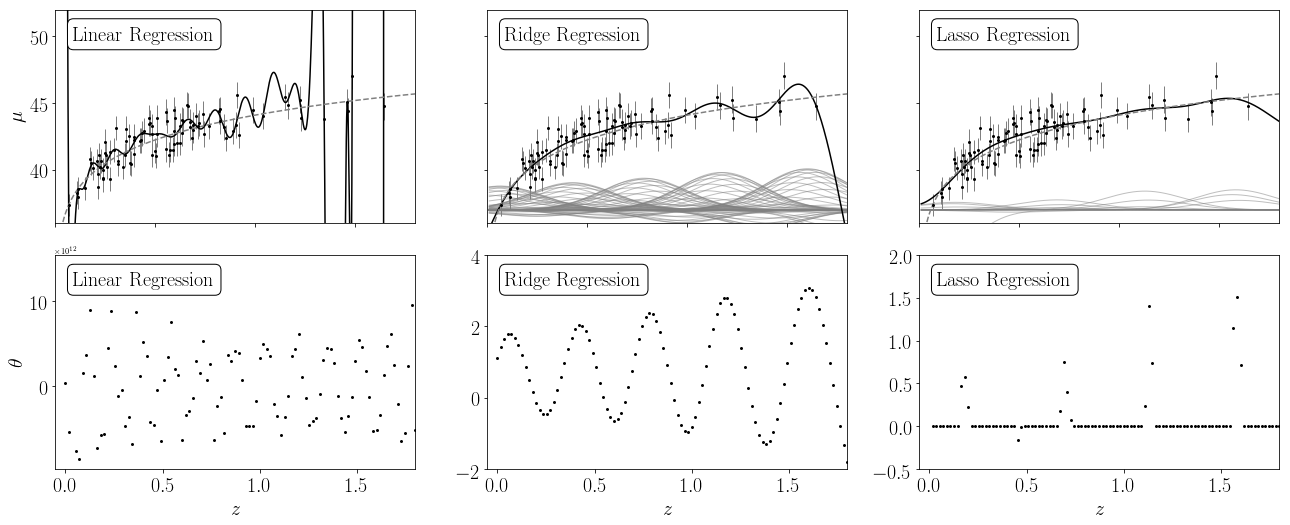

In [11]:
# NOTE: This block needs to be run twice
#
# NOTE: The code in this block is publicly available from:
#         http://www.astroml.org/book_figures/chapter8/fig_rbf_ridge_mu_z.html#book-fig-chapter8-fig-rbf-ridge-mu-z
#
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import lognorm

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------
# generate data
np.random.seed(0)

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)
cosmo = Cosmology()

z = np.linspace(0.01, 2, 1000)
mu = (map(cosmo.mu, z))
# NOTE: removed "asarray"

#------------------------------------------------------------
# Manually convert data to a gaussian basis
#  note that we're ignoring errors here, for the sake of example.
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

centers = np.linspace(0, 1.8, 100)
widths = 0.2
X = gaussian_basis(z_sample[:, np.newaxis], centers, widths)

#------------------------------------------------------------
# Set up the figure to plot the results
fig = plt.figure(figsize=(20, 7.5))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    hspace=0.15, wspace=0.2)

classifier = [LinearRegression, Ridge, Lasso]
kwargs = [dict(), dict(alpha=0.005), dict(alpha=0.001)]
labels = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

for i in range(3):
    clf = classifier[i](fit_intercept=True, **kwargs[i])
    clf.fit(X, mu_sample)
    w = clf.coef_
    fit = clf.predict(gaussian_basis(z[:, None], centers, widths))
    
    # plot fit
    ax = fig.add_subplot(231 + i)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_major_formatter(plt.NullFormatter())

    # plot curves for regularized fits
    if i == 0:
        ax.set_ylabel('$\mu$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        curves = 37 + w * gaussian_basis(z[:, np.newaxis], centers, widths)
        curves = curves[:, abs(w) > 0.01]
        ax.plot(z, curves,
                c='gray', lw=1, alpha=0.5)
       
    mu = list(mu)
    # NOTE: converting map to list or else plotting won't work
    
    ax.plot(z, fit, '-k')
    ax.plot(z, mu, '--', c='gray')

    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, ms=4)
    ax.set_xlim(0.001, 1.8)
    ax.set_ylim(36, 52)
    ax.text(0.05, 0.93, labels[i],
            size=20,
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)

    # plot weights
    ax = plt.subplot(234 + i)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.set_xlabel('$z$')
    if i == 0:
        ax.set_ylabel(r'$\theta$')
        w *= 1E-12
        ax.text(0, 1.01, r'$\rm \times 10^{12}$',
                transform=ax.transAxes)
    ax.scatter(centers, w, s=9, lw=0, c='k')

    ax.set_xlim(-0.05, 1.8)

    if i == 1:
        ax.set_ylim(-2, 4)
    elif i == 2:
        ax.set_ylim(-0.5, 2)

    ax.text(0.05, 0.93, labels[i],
            size=20,
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)
    
plt.show()

### Q: What do you observe?
[+] click to discover

[//]: # "
* Unconstrained linear regression drastically overfits. Moreover the range of parameters (and their distribution's variance) is very large. Looks like one component cancels out with the next one, therefore a lot of components are needed.

* Ridge regression "regularizes" the distribution of the parameter values, but introduces a sinusoidal correlation (?).

* LASSO regression crops out several Gaussian components. Why does this happen? Think of the graphical definition shown above. Naturally the algorithm tries to reproduce the unconstrained set **θ**. However due to the limitation we impose, it cannot grasp both the unconstrained values. As a result, the best-fit parameters are seeked for in the "corners" of the limiting square, where at least one of the parameter is optimized. However, in a corner, while one parameter is maximized the next is set to almost 0.
"

### 2.5. Final remarks on Ridge/LASSO penalization

### Pros
* Good when data points are few but still want to expand the function $f$ over a family of functions $g_p(x)$ while limiting over-fitting
 
### Cons
* The selection of the surviving "significant parameters" $θ_p$ is extremely arbitrary: not good for defining physically meaningful functions (e.g. do not try to fit a series of Schechter functions to a galaxy population to define its demographics)
* Introduces parameter correlation

### Caveat
As usual, the value $\lambda$ must be optimized using a cross-validation sample

## 3. Nadaraya - Watson Kernel Regression

Let's step back and try to construct a very simple regression model to fit our data: the average over a vertical slice. 

Consider the red vertical line at $\bar x=4$ in Figure 3.1. We can compute the mean $\langle$$\bar y$$\rangle$ of the $y$ values corresponding to $\bar x$. If we repeat this operation for every $x$ we can obtain a regression function (showed as a red curve in Figure 3.1):

$$f(x)=\frac{\sum_{n=1}^{N}y_{i}}{N}$$

<table><tr>
    <td width=400>
        <img src="images/regression_mean.jpg">
        <center>
            <br>
            Figure 3.1. Regression performed using the average along a vertical line.
            <br>
            [From here](https://gerardnico.com/data_mining/knn)
        </center>
    </td>
    <td width=400>
        <img src="images/regression_neighborhood.jpg">
        <center>
            <br>
            Figure 3.2. Regression performed using the average along a vertical slice.
            <br>
            [From here](https://gerardnico.com/data_mining/knn)
        </center>
    </td>
</tr></table>

In reality though, there are never enough data to compute a  $\langle$$y$$\rangle$ value for every $x$ (see Figure 3.2: this time, at $\bar x$ there is no $y$ data point). We can however compute the mean  $\langle$$\bar y$$\rangle$ within a small interval around $\bar x$ (vertical dotted lines). 

For a given interval, data points which are closer to $\bar x$ should affect the $\bar{y}$ computation more than the further ones. To account for this we can introduce a weight term ($w_{i}$) in the calculation of the mean (we can think of this as a **locally weighted mean regression**):

$$f(x)=\frac{1}{N} {\sum_{n=1}^{N}w_{i}y_{i}}$$

The $w_{i}$ term can be implemented through the definition a Kernel function which weights by the distance $|x_{i}- \bar x|$ from the point $\bar x$:

$$K=K( \frac{|x_{i}- \bar x|}{h} )$$

where the term $h$ (**bandwidth**) regulates the influence of the kernel and it is usually more critical than the form of the Kernel itself, because it can cause over/under-fitting. Its estimation can be achieved by using Jacknife cross-valdidation techniques which are sometimes automatically imprelemented in regression algorithms.

The weight term is then simply the normalized kernel:

$$w_{i}=\frac{K \Large(\frac{|x_{i}-x|}{h} \Large)}{\sum_{n=1}^{N} K \Large(\frac{|x_{i}-x|}{h} \Large)}$$

### 3.1. Example: fitting the distance modulus of Super-Novae (SNs) as a function of redshift

_The following example is adopted from "Statistics, Data Mining, and Machine Learning in Astronomy" -  §§ 8_

Let's apply the Kernel Regression to the SN example presented in $\S$ 2.

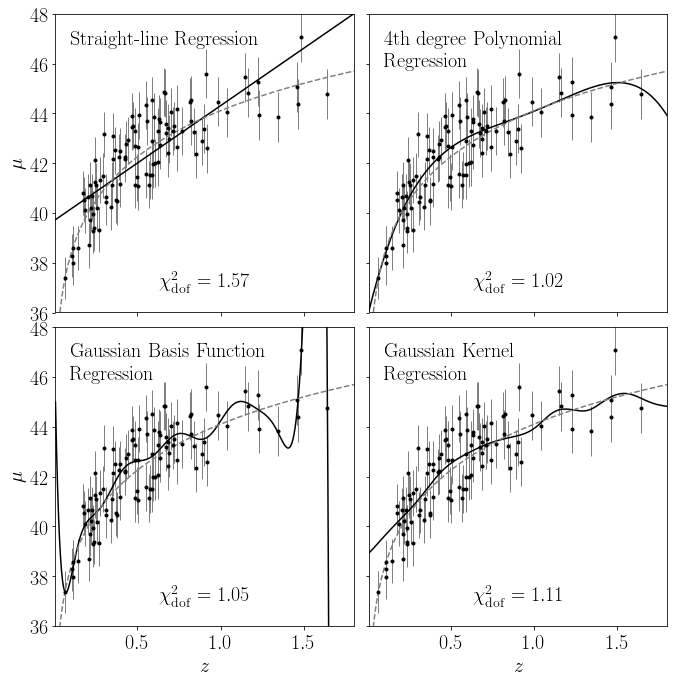

In [12]:
# NOTE: The code in this block is publicly available from:
#         http://www.astroml.org/book_figures/chapter8/fig_regression_mu_z.html
#
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import lognorm

from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z
from astroML.linear_model import LinearRegression, PolynomialRegression,\
    BasisFunctionRegression, NadarayaWatson

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate data
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)

cosmo = Cosmology()
z = np.linspace(0.01, 2, 1000)
mu_true = (map(cosmo.mu, z))

#------------------------------------------------------------
# Define our classifiers
basis_mu = np.linspace(0, 2, 15)[:, None]
basis_sigma = 3 * (basis_mu[1] - basis_mu[0])

subplots = [221, 222, 223, 224]
classifiers = [LinearRegression(),
               PolynomialRegression(4),
               BasisFunctionRegression('gaussian',
                                       mu=basis_mu, sigma=basis_sigma),
               NadarayaWatson('gaussian', h=0.1)]
text = ['Straight-line Regression',
        '4th degree Polynomial\n Regression',
        'Gaussian Basis Function\n Regression',
        'Gaussian Kernel\n Regression']

# number of constraints of the model.  Because
# Nadaraya-watson is just a weighted mean, it has only one constraint
n_constraints = [2, 5, len(basis_mu) + 1, 1]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    hspace=0.05, wspace=0.05)

for i in range(4):
    ax = fig.add_subplot(subplots[i])

    # fit the data
    clf = classifiers[i]
    clf.fit(z_sample[:, None], mu_sample, dmu)

    mu_sample_fit = clf.predict(z_sample[:, None])
    mu_fit = clf.predict(z[:, None])

    chi2_dof = (np.sum(((mu_sample_fit - mu_sample) / dmu) ** 2)
                / (len(mu_sample) - n_constraints[i]))

    mu_true = list(mu_true)
    # NOTE: converting map to list or else plotting won't work
    
    ax.plot(z, mu_fit, '-k')
    ax.plot(z, mu_true, '--', c='gray')
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

    ax.text(0.5, 0.05, r"$\chi^2_{\rm dof} = %.2f$" % chi2_dof, size=20,
            ha='center', va='bottom', transform=ax.transAxes)

    ax.set_xlim(0.01, 1.8)
    ax.set_ylim(36.01, 48)
    ax.text(0.05, 0.95, text[i], ha='left', va='top',
            size=20,
            transform=ax.transAxes)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    if i in (0, 2):
        ax.set_ylabel(r'$\mu$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    if i in (2, 3):
        ax.set_xlabel(r'$z$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

plt.show()

### Q: What do we observe?

[+] click to discover

[//]: # "
* Kernel Regression is less sensitive to data gaps than Gaussian Basis, at least in this example. 

* Kernel Regression diverges from the data for large and small $z$. Simply, the interval is ill-defined there since it is not symmetric.
"

### 3.2. Final remarks on Ridge/LASSO penalization

### Pros

* Simple and intuitive

* Useful with noisy data where the underlying functional form is not clear

### Cons

* Computationally intensive

* May not be very accurate when the sample has a few data points
  <br>
  _(Choosing the right bandwidth value can mitigate this problem)_

## A. EXERCISE: Use regression to fit and subtract galaxy continuum

In previous sessions (e.g. Introduction and MCMC) we have explored some methods to fit spectral lines.
In this exercise, we want to isolate the spectral emission lines of a late-type galaxy (e.g. a spiral) by removing the stellar continuum from the spectrum.

This procedure represents a very common step in the spectral data reductions, and it is performed through a variety of methods. The simplest approaches focus on a line at a time, removing only the local continuum by fitting it e.g. with a polynomial. Sophisticated methods fit the whole spectrum using appropriate stellar population templates. Here we will use linear regression as a quick method to obtain a fast continuum subtraction without dealing with detailed tuning.

We will use an optical spectrum from SDSS from the
[Spectral cross-correlation templates](http://classic.sdss.org/dr5/algorithms/spectemplates/)

### TASK A.1: Use the Gaussian Basis expansion and the Ridge/LASSO regularization to fit the spectrum

HINT: Try to run the regression with the full spectrum, and then removing the features we are most interested in isolating.

### TASK A.2: Compare your results with the background-subtracted spectrum distributed along with the SDSS data

### Loading the SDSS spectrum

In [13]:
# LOADING THE SDSS SPECTRUM
#
# To understand the SDSS file format, consult:
#   http://www.sdss2.org/dr3/dm/flatFiles/spSpec.html

# FITS manipulation:
from astropy.io import fits

PATH_spectrum = "data/late-type.fits"
    
hdulist = fits.open(PATH_spectrum)
data = hdulist[0].data
# Header keywords to perform wavelength calibration:
coeff0 = hdulist[0].header['coeff0']
coeff1 = hdulist[0].header['coeff1']
spectrum_flux  = data[0] # observed spectrum
spectrum_noBG  = data[1] # contimuum-subtracted spectrum
hdulist.close()

spectrum_flux = spectrum_flux[:-100]
spectrum_noBG = spectrum_noBG[:-100]
# NOTE: Removing last 100 data points, which are bogus

# Creating arbitrary uncertainty array proportional to the flux:
spectrum_flux_err = spectrum_flux * np.random.uniform(0.01, 0.1, size=len(spectrum_flux))

# Creating wavelength array using header calibrations:
spectrum_wave = 10.0 ** (coeff0 + coeff1 * np.arange(len(spectrum_flux)))

### Plotting the spectrum

In plotting, we will highlight 2 strong lines in the spectrum

In [14]:
# Defining ranges of strong features:
#   http://astronomy.nmsu.edu/drewski/tableofemissionlines.html
feature_0 = [6550, 6580] # H_alpha 6562.819
feature_1 = [6710, 6750] # SII 6730.810
# wavelength min and max for each feature [A]

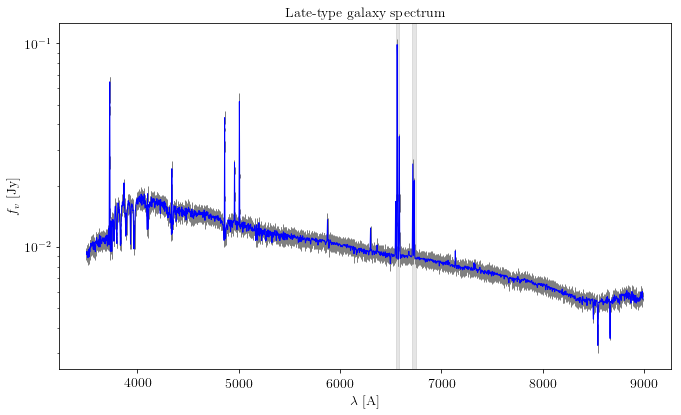

In [15]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# > Displaying spectrum:    
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0, left=0.1, right=0.95, wspace=0.4)

ax = plt.subplot(111)

ax.set_title('Late-type galaxy spectrum', fontsize=14)

ax.set_xlabel('$\lambda$ [A]', fontsize=14)
ax.set_ylabel('$f_{v}$ [Jy]',  fontsize=14)
#
ax.set_yscale('log')

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)

ax.errorbar(spectrum_wave, spectrum_flux, spectrum_flux_err, fmt='blue', ecolor='gray', lw=1, ms=4)

# Marking emission features:
ax.axvspan(feature_0[0], feature_0[1] , color='grey', alpha=0.2)
ax.axvspan(feature_1[0], feature_1[1],  color='grey', alpha=0.2)

plt.show()

### RESPONSE TO A.1: Using the Gaussian Basis expansion and the Ridge/LASSO regularization to fit the spectrum


In [16]:
# REMOVING FEATURES FROM DATA
#
# We remove the wavelength ranges corresponding to the features we want to isolate,
# to avoid that some of the Gaussians in the Gaussian Basis attempt to fit the features

valid_range = (((spectrum_wave < feature_0[0] ) | (spectrum_wave > feature_0[1])) &
               ((spectrum_wave < feature_1[0] ) | (spectrum_wave > feature_1[1])))
wave        = spectrum_wave[valid_range]
flux        = spectrum_flux[valid_range]
flux_err    = spectrum_flux_err[valid_range]

# Restore feature ranges in data:
# wave        = spectrum_wave
# flux        = spectrum_flux
# flux_err    = spectrum_flux_err

In [17]:
# MODEL PARAMETERS:

# Manually converting data to a gaussian basis:
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

n_gaussians = 100
centers = np.linspace(np.min(wave), np.max(wave), n_gaussians)
widths = 200

X = gaussian_basis(wave[:, np.newaxis], centers, widths)

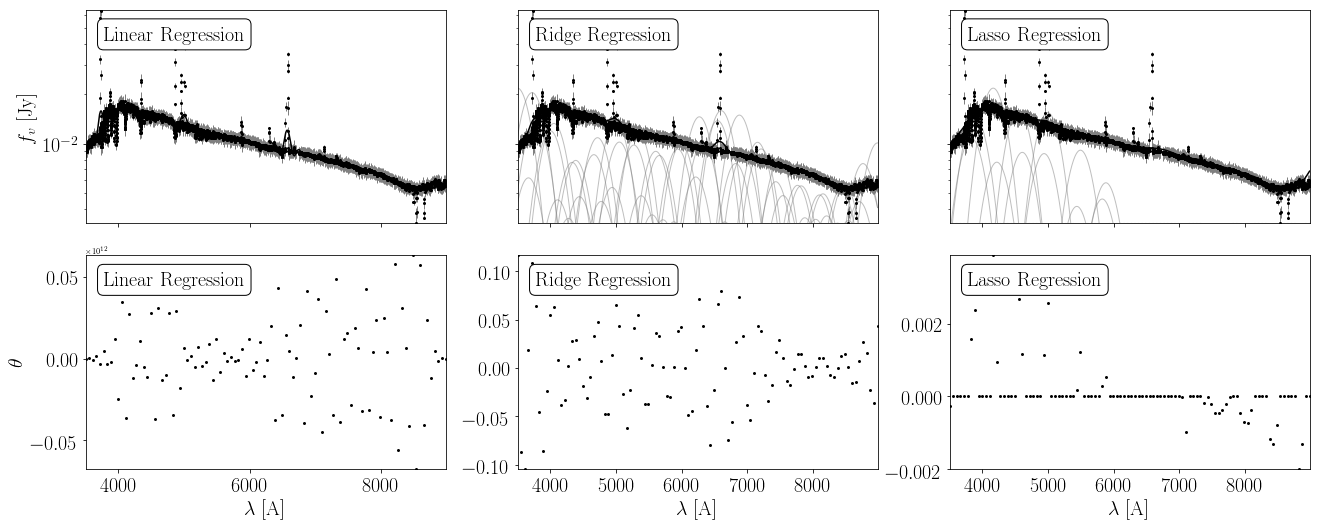

In [18]:
# NOTE: Most of the code in this block represents an edited version of:
#         http://www.astroml.org/book_figures/chapter8/fig_rbf_ridge_mu_z.html#book-fig-chapter8-fig-rbf-ridge-mu-z

from sklearn.linear_model import LinearRegression, Ridge, Lasso

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Set up the figure to plot the results

x_plot = np.linspace(np.min(wave), np.max(wave), 1000)
# sampled array for plotting purposes

fig = plt.figure(figsize=(20, 7.5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, hspace=0.15, wspace=0.2)

classifier = [LinearRegression, Ridge, Lasso]
kwargs = [dict(), dict(alpha=0.00005), dict(alpha=0.00001)]
labels = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']


for i in range(3):
    clf = classifier[i](fit_intercept=True, **kwargs[i])
    clf.fit(X, flux)
    w = clf.coef_
    fit = clf.predict(gaussian_basis(x_plot[:, None], centers, widths))
    
    # plot fit
    ax = fig.add_subplot(231 + i)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    #
    ax.set_yscale('log')

    # plot curves for regularized fits
    if i == 0:
        ax.set_ylabel('$f_{v}$ [Jy]')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        axis_ymin, axis_ymax = min(flux), max(flux)
        w_plot = (0.3 * w / max(w)) * (axis_ymax - axis_ymin) + axis_ymin
        curves = w_plot * gaussian_basis(x_plot[:, np.newaxis], centers, widths)

        ax.plot(x_plot, curves, c='gray', lw=1, alpha=0.5)
    
    # NOTE: converting map to list or else plotting won't work
    
    ax.plot(x_plot, fit, '-k')

    ax.errorbar(wave, flux, flux_err, fmt='.k', ecolor='gray', lw=1, ms=4)
    ax.set_xlim(np.min(wave),np.max(wave))
    ax.set_ylim(np.min(flux),np.max(flux))
    ax.text(0.05, 0.93, labels[i],
            size=20,
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)
    
    
    # plot weights
    ax = plt.subplot(234 + i)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.set_xlabel('$\lambda$ [A]')
    if i == 0:
        ax.set_ylabel(r'$\theta$')
        w *= 1E-12
        ax.text(0, 1.01, r'$\rm \times 10^{12}$',
                transform=ax.transAxes)
    ax.scatter(centers, w, s=9, lw=0, c='k')

    ax.set_xlim(np.min(centers), np.max(centers))

    ax.set_ylim(np.min(w), np.max(w))

    ax.text(0.05, 0.93, labels[i],
            size=20,
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)

from scipy.interpolate import interp1d
plt.show()

### RESPONSE TO A.2: Comparing background subtraction with SDSS results

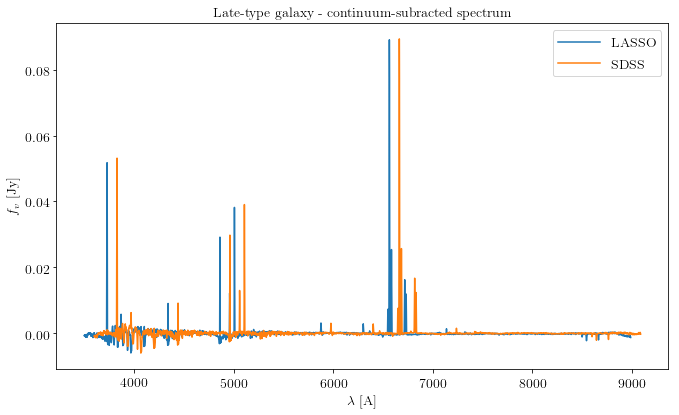

In [19]:
# RESAMPLING LASSO FITTED CURVE TO DATA
#
# In order to plot the fitting curve produced by the classifier ("fit")
#   along with "spectrum_flux", we first resample it to the same
#   array, i.e. "sample_wave"
# This is because "fit" has been sampled on "x_plot", which has
#   a different sampling than "spectrum_wave"

from scipy.interpolate import interp1d

clf = classifier[2](fit_intercept=True, **kwargs[i]) # LASSO
clf.fit(X, flux)

fit = clf.predict(gaussian_basis(x_plot[:, None], centers, widths))

f = interp1d(x_plot, fit, kind='cubic')
# interpolation function
# - linear
# - quadratic
# - cubic
fit_interp = f(spectrum_wave) 


# PLOTTING

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# > Displaying spectrum:    
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0, left=0.1, right=0.95, wspace=0.4)

ax = plt.subplot(111)

ax.set_title('Late-type galaxy - continuum-subracted spectrum', fontsize=14)

ax.set_xlabel('$\lambda$ [A]', fontsize=14)
ax.set_ylabel('$f_{v}$ [Jy]', fontsize=14)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)

ax.plot(spectrum_wave,     spectrum_flux - fit_interp, label='LASSO')
ax.plot(spectrum_wave+100, spectrum_noBG,              label='SDSS')

ax.legend(fontsize=14)

plt.show()

NOTE: The SDSS spectrum have been arbitrarily shifted for presentation purposes